# data 

In [30]:
import pandas as pd
import numpy as np

In [31]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/gamedata.pickle',"rb") as dt:
    data = pickle.load(dt)

In [32]:
data['Time'] = list(map(lambda x:x[3:],data['Time']))
data['Time'] = list(map(lambda x:int(x.split('-')[0])*60+int(x.split('-')[1]),data['Time']))

In [33]:
data = data[2:]
data = data.reset_index().drop(['index'],axis=1)
data

,Time,blue_gold,blue_towers,blue_barons,blue_totalKills,blue_dragons,red_gold,red_towers,red_barons,red_totalKills,red_dragons
0,271,2500,0,0,0,0,2500,0,0,0,0
1,272,2500,0,0,0,0,2500,0,0,0,0
2,273,2500,0,0,0,0,2500,0,0,0,0
3,274,2500,0,0,0,0,2500,0,0,0,0
4,275,2500,0,0,0,0,2500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2305,2617,74982,9,2,21,4,65126,3,0,13,2
2306,2618,74992,9,2,21,4,65136,3,0,13,2
2307,2619,75003,9,2,21,4,65148,3,0,13,2
2308,2620,75013,9,2,21,4,65158,3,0,13,2


In [34]:
datas = pd.DataFrame(columns = data.columns)
first = data.loc[0]['Time']
time = first
index = 0
while(time <2621):
    temp = data.loc[[index],:]
    if int(temp['Time']) == time :
        datas = pd.concat([datas, temp],ignore_index=True)
        index+=1
    else:
        temp['Time'] =time
        datas = pd.concat([datas, temp],ignore_index=True)
    time +=1
    


In [35]:
datas = datas.drop(['Time'],axis='columns')
datas

,blue_gold,blue_towers,blue_barons,blue_totalKills,blue_dragons,red_gold,red_towers,red_barons,red_totalKills,red_dragons
0,2500,0,0,0,0,2500,0,0,0,0
1,2500,0,0,0,0,2500,0,0,0,0
2,2500,0,0,0,0,2500,0,0,0,0
3,2500,0,0,0,0,2500,0,0,0,0
4,2500,0,0,0,0,2500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2345,74922,9,2,21,4,65116,3,0,13,2
2346,74982,9,2,21,4,65126,3,0,13,2
2347,74992,9,2,21,4,65136,3,0,13,2
2348,75003,9,2,21,4,65148,3,0,13,2


In [36]:
#baron, daragon, end
baron = []
dragon = []
end = []
bb=0
rb=0
bd=0
rd=0
for i in range(datas.shape[0]):
    if datas.loc[i]['blue_barons']!=bb:
        baron.append(i)
        bb = datas.loc[i]['blue_barons']
    if datas.loc[i]['red_barons']!=rb:
        baron.append(i)
        rb = datas.loc[i]['red_barons']
    if datas.loc[i]['blue_dragons']!=bd:
        dragon.append(i)
        bd = datas.loc[i]['blue_dragons']
    if datas.loc[i]['red_dragons']!=rd:
        dragon.append(i)
        rd = datas.loc[i]['red_dragons']
end.append(len(datas)-1)
        

In [37]:
highlight_add = baron+dragon+end

In [38]:
data_blue = datas[['blue_gold','blue_towers','blue_totalKills']]
data_red = datas[['red_gold','red_towers','red_totalKills']]

In [39]:
data_blue.columns=['gold','tower','kill']

In [40]:
data_red.columns=['gold','tower','kill']

In [41]:
#normalization
goldSum = data_blue['gold'].sum()+len(data_blue)
towerSum = data_blue['tower'].sum()+len(data_blue)
killSum = data_blue['kill'].sum()+len(data_blue)

data_blue['gold'] = list(map(lambda x:(x+1)/goldSum,data_blue['gold']))
data_blue['tower'] = list(map(lambda x:(x+1)/towerSum,data_blue['tower']))
data_blue['kill'] = list(map(lambda x:(x+1)/killSum,data_blue['kill']))


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [42]:
data_blue

,gold,tower,kill
0,0.000031,0.000133,0.000053
1,0.000031,0.000133,0.000053
2,0.000031,0.000133,0.000053
3,0.000031,0.000133,0.000053
4,0.000031,0.000133,0.000053
...,...,...,...
2345,0.000921,0.001329,0.001174
2346,0.000921,0.001329,0.001174
2347,0.000922,0.001329,0.001174
2348,0.000922,0.001329,0.001174


# road model

In [43]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
 

# load model
from keras.models import load_model
model = load_model('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/957-0.3305.hdf5')

# test
predict_blue = model.predict(data_blue)

In [44]:
predict_blue

array([[0.66534996, 0.07210311],
       [0.66534996, 0.07210311],
       [0.66534996, 0.07210311],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]], dtype=float32)

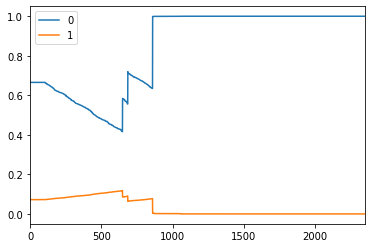

In [45]:
pd.DataFrame(predict_blue).plot()

In [46]:
predict_blue = pd.DataFrame(predict_blue)
predict_red = predict_blue[1]
predict_blue = predict_blue[0]

In [47]:
predict_blue

0       0.66535
1       0.66535
2       0.66535
3       0.66535
4       0.66535
         ...   
2345    1.00000
2346    1.00000
2347    1.00000
2348    1.00000
2349    1.00000
Name: 0, Length: 2350, dtype: float32

In [48]:
predict_red

0       0.072103
1       0.072103
2       0.072103
3       0.072103
4       0.072103
          ...   
2345    0.000000
2346    0.000000
2347    0.000000
2348    0.000000
2349    0.000000
Name: 1, Length: 2350, dtype: float32

In [49]:
predict_temp = list(predict_blue)
predict_temp.insert(0,0)
predict_temp.pop(-1)

1.0

In [50]:
predict_blue = abs(np.array(predict_blue)-np.array(predict_temp))

In [51]:
predict_blue[0] = predict_blue[1]

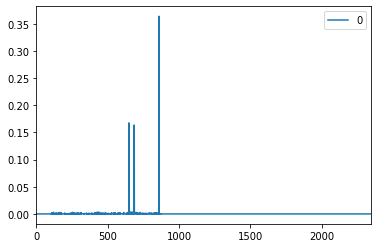

In [52]:
pd.DataFrame(predict_blue).plot()

In [53]:
predict_temp = list(predict_red)
predict_temp.insert(0,0)
predict_temp.pop(-1)

0.0

In [54]:
predict_red = abs(np.array(predict_red)-np.array(predict_temp))

In [55]:
predict_red[0] = predict_red[1]

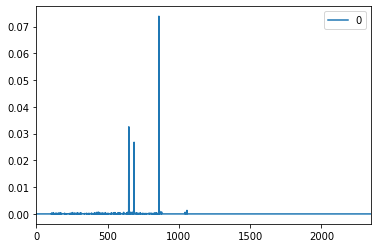

In [56]:
pd.DataFrame(predict_red).plot()

In [57]:
predict_delta = predict_blue+predict_red

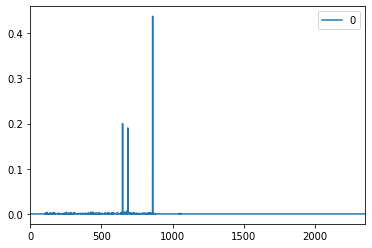

In [58]:
pd.DataFrame(predict_delta).plot()

In [59]:
highlight = []
for i,v in enumerate(predict_delta):
    if v>0.005:
        highlight.append(i)

In [60]:
highlight

[649, 683, 686, 687, 860]

In [61]:
highlight_add

[1629, 2173, 403, 760, 1131, 1444, 1755, 2135, 2349]

In [62]:
for i in highlight:
    print(i//60, i%60)
print()
for i in highlight_add:
    print(i//60, i%60)

10 49
11 23
11 26
11 27
14 20

27 9
36 13
6 43
12 40
18 51
24 4
29 15
35 35
39 9
